In [1]:
import pandas as pd
import numpy as np

import matplotlib as m_plt
from matplotlib import pyplot as plt

from copy import copy
from pprint import pprint

import sys
import os
#from sklearn import datasets

# Practica I - Data Exploration

## 1.- Data 1 - Boston House Pricing

### 1.1.- Retrieving Data

#### 1.1.1.- Reading Data

In [2]:
try :
    boston_dataset = pd.read_csv("./boston/housing.data", sep="\t", header=None)
    boston_dataset.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
except:
    print("ERROR, DATA NOT LOADED")
else:
    print("""DATA SUCCESSFULLY LOADED\n
    \tRows\t:\t{:d}\t|\tColumns\t:\t{:d}""".format(boston_dataset.shape[0], boston_dataset.shape[1]))

DATA SUCCESSFULLY LOADED

    	Rows	:	506	|	Columns	:	14


#### 1.1.2.- Data Labels
0. **CRIM**      :  *per capita crime rate by town*
2. **ZN**        :  *proportion of residential land zoned for lots over 25,000 sq.ft.*
3. **INDUS**     :  *proportion of non-retail business acres per town*
4. **CHAS**      :  *Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)*
5. **NOX**       :  *nitric oxides concentration (parts per 10 million)*
6. **RM**        :  *average number of rooms per dwelling*
7. **AGE**       :  *proportion of owner-occupied units built prior to 1940*
8. **DIS**       :  *weighted distances to five Boston employment centres*
9. **RAD**       :  *index of accessibility to radial highways*
10. **TAX**      :  *full-value property-tax rate per \$10 000*
11. **PTRATIO**  :  *pupil-teacher ratio by town*
12. **B**        :  *1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town*
13. **LSTAT**    :  *\% lower status of the population*
14. **MEDV**     :  *Median value of owner-occupied homes in \$1000's*

#### 1.1.3.- Viewing Data

In [3]:
#Section
boston_dataset.iloc[4:12, :]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9
10,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45,15.0
11,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311.0,15.2,396.90,13.27,18.9


### 1.2.- Attributes Choose

#### 1.2.1.- Choosed Attributes and Hypothesis

**Hypothesis** : The houses near to the industrial center are more expensive because being Boston a mainly industrial center (at that time) far places implies more time expended traveling to there.

**Attributes**

* **ZN (id 1)**        :  *proportion of residential land zoned for lots over 25,000 sq.ft.*
    > Available Places Criteria I, Supply
* **RM (id 5)**        :  *average number of rooms per dwelling*
    > Available Places Criteria II, Supply
* **DIS (id 7)**       :  *weighted distances to five Boston employment centres*
    > "Nearly to" Criteria, Demand
* **RAD (id 8)**       :  *index of accessibility to radial highways*
    > Variable who affects directly in the traveling time, Demand.
* **MEDV (id 13)**     :  *Median value of owner-occupied homes in \$1000's*
    > Affects directly in the rent value, Expensiveness.

#### 1.2.2.- Selecting Data

In [4]:
case_data_Boston = boston_dataset.iloc[:,[1, 5, 7, 8, 13]].copy()
case_data_Boston.columns = ["Available x25K ft", "Rooms", "Distance", "Accessibility", "Cost x 1K"]

##### 1.2.2.1.- Normalize

In [5]:
case_data_Boston_norm = (case_data_Boston - case_data_Boston.min())
case_data_Boston_norm = (case_data_Boston_norm / case_data_Boston_norm.max())
case_data_Boston = case_data_Boston_norm * 100

### 1.3 Data Exploration

In [6]:
def dummy_DataFrame_plotter(dataFrame_dummy,
                            plot_size=(10,10),
                            grid_subplot=[3,3],
                            mixed_style=False,
                            plot_style='', 
                            grid=False, 
                            have_lines=False,
                            line_style='r',
                            constant_values=[], 
                            verbose=False):
    
    plt.figure(figsize=plot_size)
    
    for column_id in range(dataFrame_dummy.shape[1]):
        
        temp_obj = plt.subplot(grid_subplot[0],grid_subplot[1], column_id + 1)
        
        temp_values = dataFrame_dummy.iloc[:, column_id]
        temp_obj.set_title(dataFrame_dummy.columns[column_id] + "    [Id   : {:d}]".format(column_id))
        
        if mixed_style:
            for temp_style in plot_style:
                temp_obj.plot(temp_values, temp_style)
        else:
            temp_obj.plot(temp_values, plot_style)
        
        if grid:
            temp_obj.grid()
        else:
            pass
        
        if have_lines:
            try:
                for temp_constant in constant_values[column_id]:
                    line_x = [dataFrame_dummy.index.values.min(), dataFrame_dummy.index.values.max()]
                    line_y = [temp_constant, temp_constant]
                    
                    temp_obj.plot(line_x, line_y, line_style)
            except:
                line_x = [dataFrame_dummy.index.values.min(), dataFrame_dummy.index.values.max()]
                line_y = [constant_values[column_id], constant_values[column_id]]

                temp_obj.plot(line_x, line_y, line_style)
            else:
                pass
            
        
        if verbose:
            temp_shape = dataFrame_dummy.iloc[:, column_id].shape 
            print("Column ID {:d} elements : [{:f}]".format(column_id, temp_shape[0]))
    
    return plt

def dummy_Histogram_plotter(histogram_container,
                            plot_size=(15,15),
                            grid_subplot=[3,3]):
    
    plt.figure(figsize=plot_size)
    
    for plot_id in range(len(histogram_container)):
        
        temp_obj = plt.subplot(grid_subplot[0],grid_subplot[1], plot_id + 1)
        
        temp_obj.set_title("[Id   : {:d}]".format(plot_id))
        
        temp_bins = histogram_container[plot_id][1]
        
        temp_color = m_plt.colors.Colormap(name="temp_color", N=len(temp_bins))
        
        temp_obj.bar( height=histogram_container[plot_id][0], 
                     x=temp_bins
                    )
    return plt

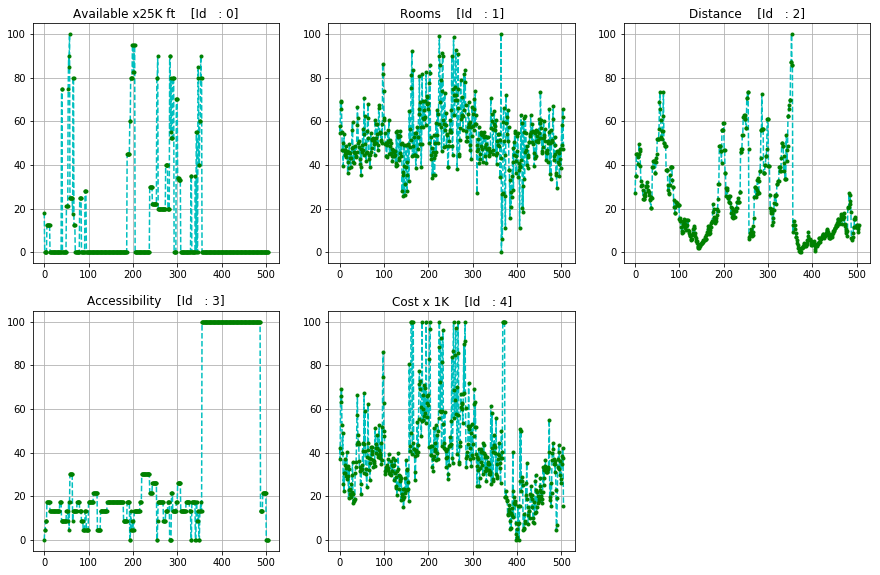

In [7]:
tmp_plt = dummy_DataFrame_plotter(case_data_Boston,
                        plot_size=(15,15), 
                        mixed_style=True,
                        plot_style=["c--", "g."], 
                        grid=True)

#### 1.3.1 Mean

In [8]:
mean_Boston = case_data_Boston.mean().copy()

##### PLOT

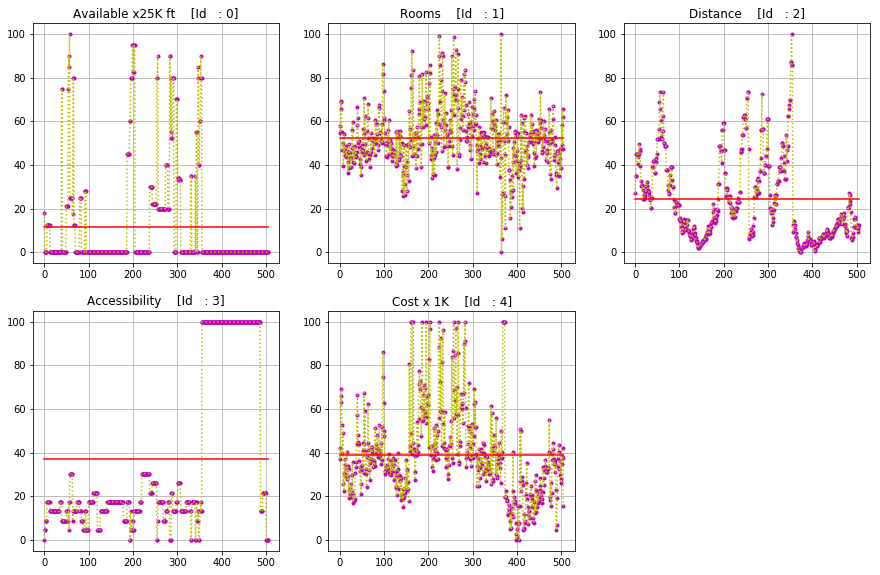

In [9]:
dummy_DataFrame_plotter(case_data_Boston,
                        plot_size=(15,15),
                        mixed_style=True,
                        plot_style=['m.', 'y:'],
                        grid=True,
                        have_lines=True,
                        constant_values=mean_Boston.values).show()


#### 1.3.2 Median

In [10]:
median_Boston = case_data_Boston.median()
print(median_Boston)

Available x25K ft     0.000000
Rooms                50.728109
Distance             18.894870
Accessibility        17.391304
Cost x 1K            36.000000
dtype: float64


##### PLOT

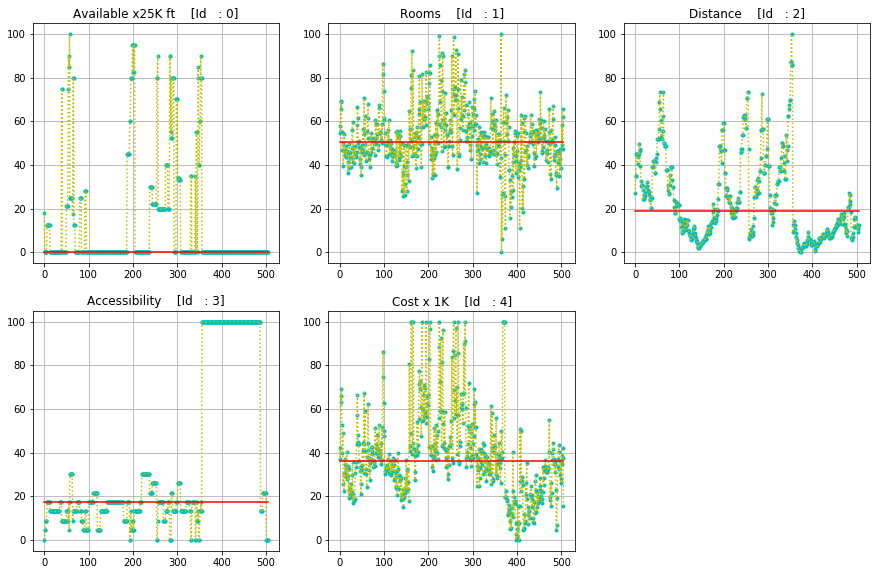

In [11]:
dummy_DataFrame_plotter(case_data_Boston,
                        plot_size=(15,15),
                        mixed_style=True,
                        plot_style=['c.', 'y:'],
                        grid=True,
                        have_lines=True,
                        constant_values=median_Boston.values).show()


#### 1.3.3 Mode

In [12]:
mode_Boston = case_data_Boston.mode(axis=1, numeric_only=True).copy()

histogram_container = []
for id_columns in range(mode_Boston.shape[1]):
    temp_bins, temp_ocurr = np.unique(mode_Boston.dropna().iloc[:, id_columns], 
                                              return_counts=True)
    
    histogram_container.append([copy(temp_ocurr), copy(temp_bins)])

##### PLOT

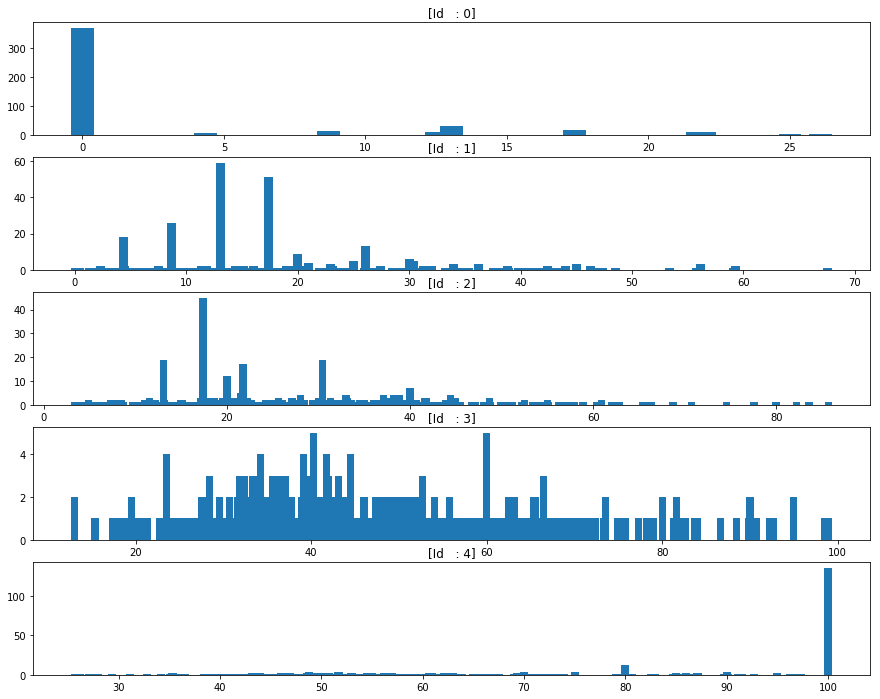

In [13]:
dummy_Histogram_plotter(histogram_container, grid_subplot=[5,1], plot_size=(15,12)).show()

##### 1.3.4 Quantile

In [14]:
quantile_n = 200
quantile_container = []
for ii in range(quantile_n):
    quantile_float = ((ii + 1.0) / quantile_n)
    quantile_container.append(case_data_Boston.quantile(q=quantile_float, axis=0).values)

##### PLOT

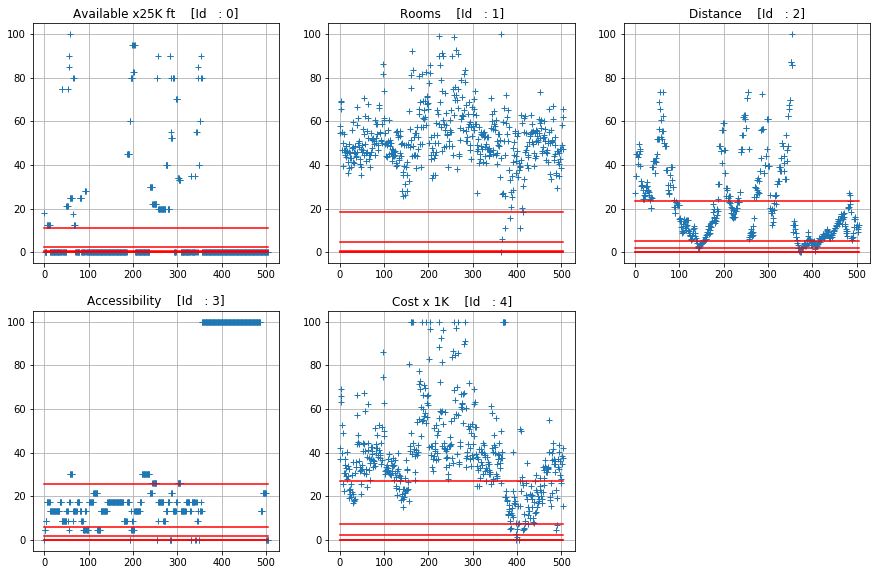

In [15]:
dummy_DataFrame_plotter(case_data_Boston,
                        plot_size=(15,15),
                        grid=True,
                        plot_style='+',
                        have_lines=True,
                        constant_values=quantile_container).show()


#### 1.3.5 Unique

In [16]:
unique_container = []
for id_columns in range(case_data_Boston.shape[1]):
    unique_temp = np.unique(case_data_Boston.dropna().iloc[:, id_columns])
    unique_container.append(unique_temp)

##### PLOT

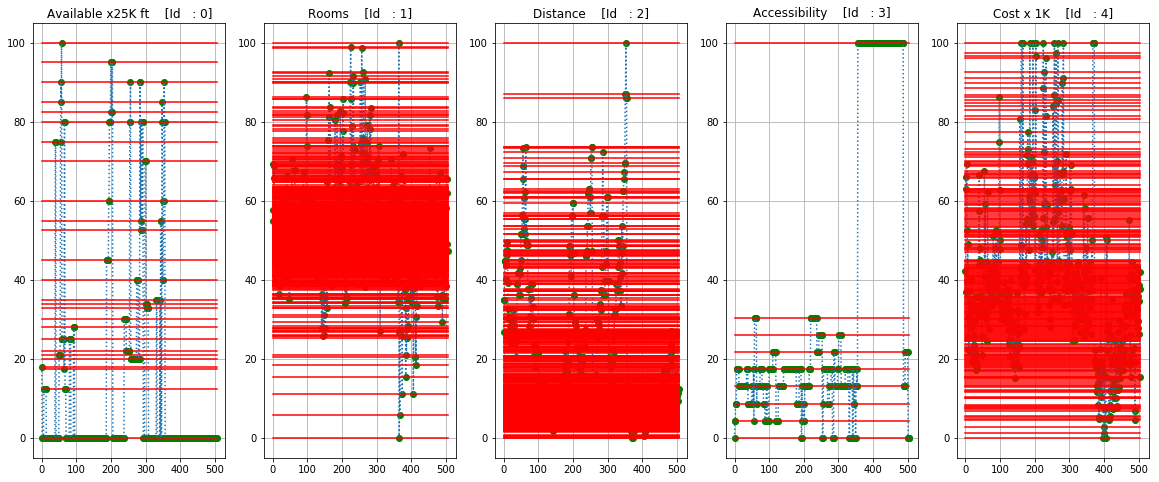

In [17]:
dummy_DataFrame_plotter(case_data_Boston,
                        grid_subplot=[1,5],
                        plot_size=(20,8),
                        grid=True,
                        mixed_style=True,
                        plot_style=['go', ':'],
                        have_lines=True,
                        constant_values=unique_container).show()

#### 1.3.6 General Description

In [18]:
case_data_Boston.describe(percentiles=None, include=None, exclude=None)

,Available x25K ft,Rooms,Distance,Accessibility,Cost x 1K
count,506.000000,506.000000,506.000000,506.000000,506.000000
mean,11.363636,52.186901,24.238128,37.171335,38.961792
std,23.322453,13.462678,19.148216,37.857649,20.438009
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,44.539184,8.825896,13.043478,26.722222
50%,0.000000,50.728109,18.894870,17.391304,36.000000
75%,12.500000,58.679824,36.908811,100.000000,44.444444
max,100.000000,100.000000,100.000000,100.000000,100.000000


### 1.4 Hypotesis Related Questions and Answers

#### 1.4.1 the more close residential center is from the Industrial zone, the denser are?

Considering the [Plot 3] in 1.3.5 Section ***(Unique Descriptor)***, if we limit the plot range were the lower "distance" values are, the relation (in his strong definition) can be assumed as true.

Strong Hypothesis: + Near to, + People
Weak Hypothesis: - Near To, - People

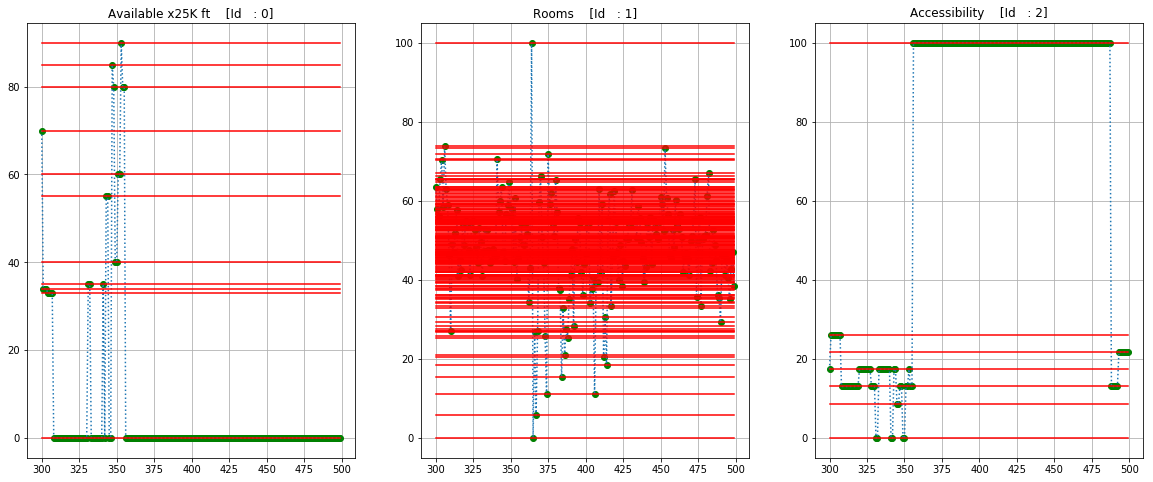

In [19]:
a_hypotesis_df = case_data_Boston.iloc[300:500, [0, 1, 3]].copy()

a_hypotesis_container = []
for id_columns in range(a_hypotesis_df.shape[1]):
    a_hypotesis_temp = np.unique(a_hypotesis_df.dropna().iloc[:, id_columns])
    a_hypotesis_container.append(a_hypotesis_temp)

dummy_DataFrame_plotter(a_hypotesis_df,
                        grid_subplot=[1,3],
                        plot_size=(20,8),
                        grid=True,
                        mixed_style=True,
                        plot_style=['go', ':'],
                        have_lines=True,
                        constant_values=a_hypotesis_container
                       ).show()

#### 1.4.2 [1.4.1] being one of the closers,  implies more accessibility?

Yes, but not only. The more closest is, it is more probably have better accessibility

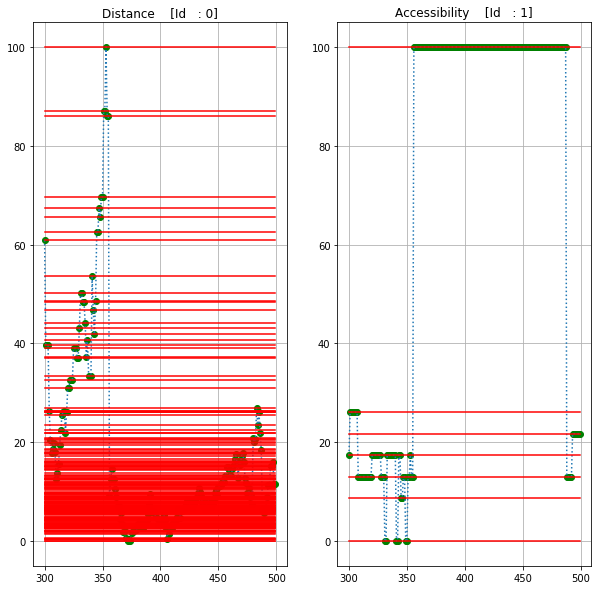

In [20]:
b_hypotesis_df = case_data_Boston.iloc[300:500, [2, 3]].copy()

b_hypotesis_container = []
for id_columns in range(b_hypotesis_df.shape[1]):
    b_hypotesis_temp = np.unique(b_hypotesis_df.dropna().iloc[:, id_columns])
    b_hypotesis_container.append(b_hypotesis_temp)

dummy_DataFrame_plotter(b_hypotesis_df,
                        grid_subplot=[1,2],
                        grid=True,
                        mixed_style=True,
                        plot_style=['go', ':'],
                        have_lines=True,
                        constant_values=b_hypotesis_container
                       ).show()

#### 1.4.3 rent increased the more nearly you are?

it is impossible to arrive at some conclusion (weak or strong), because of the standard deviation of the cost values arent near to the distance values

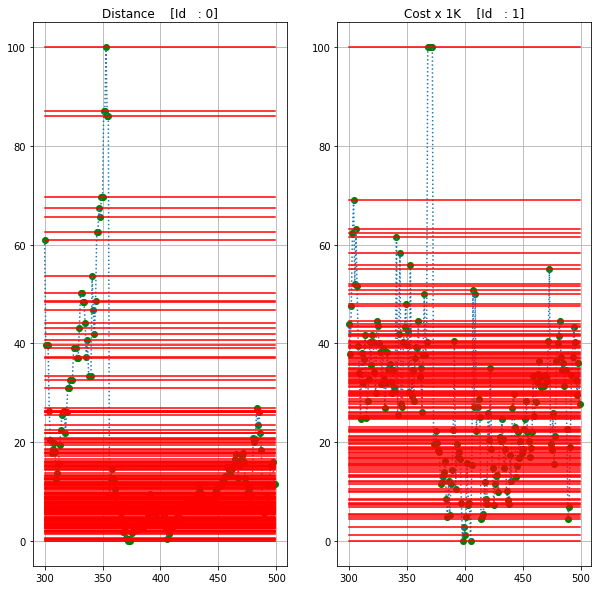

In [21]:
c_hypotesis_df = case_data_Boston.iloc[300:500, [2, 4]].copy()

c_hypotesis_container = []
for id_columns in range(c_hypotesis_df.shape[1]):
    c_hypotesis_temp = np.unique(c_hypotesis_df.dropna().iloc[:, id_columns])
    c_hypotesis_container.append(c_hypotesis_temp)

dummy_DataFrame_plotter(c_hypotesis_df,
                        grid_subplot=[1,2],
                        grid=True,
                        mixed_style=True,
                        plot_style=['go', ':'],
                        have_lines=True,
                        constant_values=c_hypotesis_container
                       ).show()

#### 1.5 Issues

* The data isn't normalize
* Have NaN values
* Small and not so detailed dictionary of variables 

_ _ _

___


_ _ _

## 2.- Data 2 - Instituições de Educação Superior

### 2.1.- Retrieving Data

#### 2.1.1.- Reading Data

In [22]:
try :
    ieducations_dataset = pd.read_csv("./microdados_censo_superior_2014/2014/DADOS/DM_IES.CSV", sep='|', encoding='latin1')
except:
    print("ERROR, DATA NOT LOADED")
else:
    print("""DATA SUCCESSFULLY LOADED\n
    \tRows\t:\t{:d}\t|\tColumns\t:\t{:d}""".format(boston_dataset.shape[0], boston_dataset.shape[1]))

DATA SUCCESSFULLY LOADED

    	Rows	:	506	|	Columns	:	14


#### 2.1.2.- Data Labels

In [23]:
ieducationals_descriptions = pd.read_excel("./microdados_censo_superior_2014/2014/ANEXOS/ANEXO I/ANEXO I - 2014.xlsx", encoding='latin1')
ieducationals_descriptions.columns = ieducationals_descriptions.iloc[0,:]
ieducationals_descriptions = ieducationals_descriptions.reindex(ieducationals_descriptions.index.drop(0))
ieducationals_descriptions

,N,Nome da Variável,Descrição da Variável,Tipo,Tam.(1),Categorias
1,DADOS DA IES,NaN,NaN,NaN,NaN,NaN
2,1,CO_IES,Código único de identificação da IES,Num,8,NaN
3,2,NO_IES,Nome da IES,Char,200,NaN
4,3,SGL_IES,Sigla da IES,Char,20,NaN
5,4,CO_MANTENEDORA,Código único de identificação da mantenedora,Num,8,NaN
6,5,NO_MANTENEDORA,Nome da mantenedora,Char,200,NaN
7,6,CO_CATEGORIA_ADMINISTRATIVA,Código da Categoria Administrativa,Num,8,1. Pública Federal
8,NaN,NaN,NaN,NaN,NaN,2. Pública Estadual
9,NaN,NaN,NaN,NaN,NaN,3. Pública Municipal
10,NaN,NaN,NaN,NaN,NaN,4. Privada com fins lucrativos


#### 2.1.3.- Viewing Data

In [24]:
ieducations_dataset.iloc[10:15, :]

,CO_IES,NO_IES,SGL_IES,CO_MANTENEDORA,NO_MANTENEDORA,CO_CATEGORIA_ADMINISTRATIVA,DS_CATEGORIA_ADMINISTRATIVA,CO_ORGANIZACAO_ACADEMICA,DS_ORGANIZACAO_ACADEMICA,CO_MUNICIPIO_IES,...,VL_RECEITA_PROPRIA,VL_TRANSFERENCIA,VL_OUTRA_RECEITA,VL_DES_PESSOAL_REM_DOCENTE,VL_DES_PESSOAL_REM_TECNICO,VL_DES_PESSOAL_ENCARGO,VL_DES_CUSTEIO,VL_DES_INVESTIMENTO,VL_DES_PESQUISA,VL_DES_OUTRAS
10,18,UNIVERSIDADE CATÓLICA DE PELOTAS,UCPEL,18,SOCIEDADE PELOTENSE DE ASSISTENCIA E CULTURA(S...,5,Privada sem fins lucrativos,1,Universidade,4314407,...,7.894191e+07,0.00,5.797977e+06,2.602745e+07,1.253955e+07,3834444.75,1662554.20,1475652.23,3644347.33,4.160242e+07
11,19,PONTIFÍCIA UNIVERSIDADE CATÓLICA DE CAMPINAS,PUC-CAMPINAS,19,SOCIEDADE CAMPINEIRA DE EDUCACAO E INSTRUCAO,5,Privada sem fins lucrativos,1,Universidade,3509502,...,2.270624e+08,3923447.18,2.807421e+07,7.926935e+07,4.056702e+07,49420223.26,34381020.74,18843000.00,6963160.34,1.942829e+07
12,20,UNIVERSIDADE DE PASSO FUNDO,UPF,20,FUNDACAO UNIVERSIDADE DE PASSO FUNDO,5,Privada sem fins lucrativos,1,Universidade,4314100,...,2.639809e+08,2787447.31,8.246577e+07,9.031341e+07,3.436398e+07,48785819.70,96088925.43,23906071.76,5461299.75,6.577762e+07
13,21,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO GRANDE...,PUCRS,21,UNIAO BRASILEIRA DE EDUCACAO E ASSISTENCIA,5,Privada sem fins lucrativos,1,Universidade,4314902,...,3.909450e+08,8001545.13,1.549417e+08,1.110816e+08,6.536671e+07,96889748.59,99739237.39,26216083.04,55019625.58,1.214524e+08
14,22,UNIVERSIDADE PRESBITERIANA MACKENZIE,MACKENZIE,22,INSTITUTO PRESBITERIANO MACKENZIE,5,Privada sem fins lucrativos,1,Universidade,3550308,...,5.542484e+08,0.00,3.880826e+07,1.977172e+08,1.213924e+08,81814354.01,0.00,36429948.69,2789691.71,1.314069e+08


### 2.2.- Attributes Choose

#### 2.2.1.- Choosed Attributes and Hypothesis

**Hypothesis** : The houses near to the industrial center are more expensive because being Boston a mainly industrial center (at that time) far places implies more time expended traveling to there.

**Attributes**

* **ZN (id 1)**        :  *proportion of residential land zoned for lots over 25,000 sq.ft.*
    > Available Places Criteria I, Supply
* **RM (id 5)**        :  *average number of rooms per dwelling*
    > Available Places Criteria II, Supply
* **DIS (id 7)**       :  *weighted distances to five Boston employment centres*
    > "Nearly to" Criteria, Demand
* **RAD (id 8)**       :  *index of accessibility to radial highways*
    > Variable who affects directly in the traveling time, Demand.
* **MEDV (id 13)**     :  *Median value of owner-occupied homes in \$1000's*
    > Affects directly in the rent value, Expensiveness.

#### 1.2.2.- Selecting Data

In [25]:
case_data_Boston = boston_dataset.iloc[:,[1, 5, 7, 8, 13]].copy()
case_data_Boston.columns

Index(['ZN', 'RM', 'DIS', 'RAD', 'MEDV'], dtype='object')

### 1.3 Data Exploration

In [26]:
def dummy_DataFrame_plotter(dataFrame_dummy,
                            plot_size=(15,15),
                            grid_subplot=[3,3],
                            mixed_style=False,
                            plot_style='', 
                            grid=False, 
                            have_lines=False, 
                            constant_values=[]):
    
    plt.figure(figsize=plot_size)
    
    for column_id in range(dataFrame_dummy.shape[1]):
        
        temp_obj = plt.subplot(grid_subplot[0],grid_subplot[1], column_id + 1)
        
        temp_obj.set_title(dataFrame_dummy.columns[column_id] + "    [Id   : {:d}]".format(column_id))
        
        if mixed_style:
            for temp_style in plot_style:
                temp_obj.plot(dataFrame_dummy.iloc[:, column_id], temp_style)
        else:
            temp_obj.plot(dataFrame_dummy.iloc[:, column_id], plot_style)
        
        if grid:
            temp_obj.grid()
        else:
            pass
        
        if have_lines:
            try:
                for temp_constant in constant_values[column_id]:
                    temp_obj.plot(temp_constant * np.ones((dataFrame_dummy.shape[0])), 'r')
            except:
                temp_obj.plot(constant_values[column_id] * np.ones((dataFrame_dummy.shape[0])), 'r')
            else:
                pass
    return plt

def dummy_Histogram_plotter(histogram_container,
                            plot_size=(15,15),
                            grid_subplot=[3,3]):
    
    plt.figure(figsize=plot_size)
    
    for plot_id in range(len(histogram_container)):
        
        temp_obj = plt.subplot(grid_subplot[0],grid_subplot[1], plot_id + 1)
        
        temp_obj.set_title("[Id   : {:d}]".format(plot_id))
        
        temp_bins = histogram_container[plot_id][1]
        
        temp_color = m_plt.colors.Colormap(name="temp_color", N=len(temp_bins))
        
        temp_obj.bar( height=histogram_container[plot_id][0], 
                     x=temp_bins
                    )
    return plt

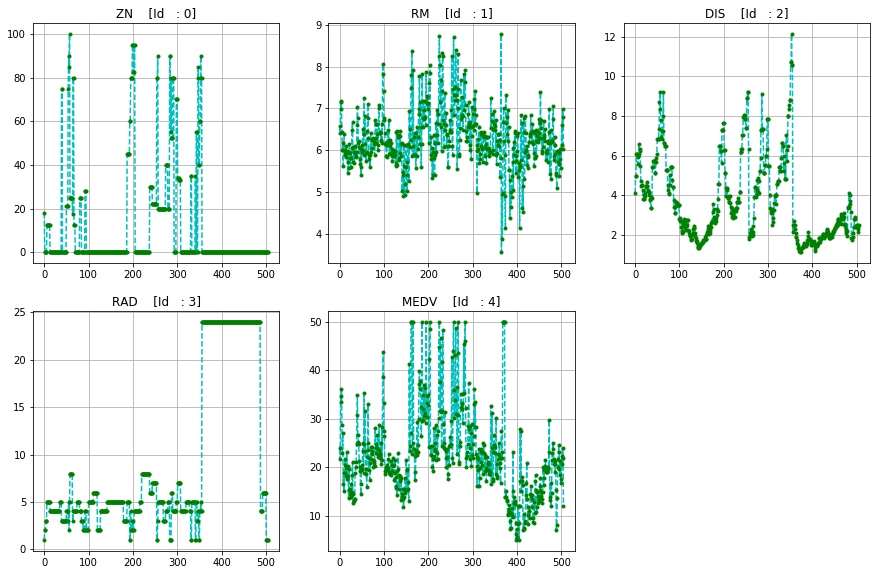

In [27]:
tmp_plt = dummy_DataFrame_plotter(case_data_Boston,
                        plot_size=(15,15), 
                        mixed_style=True,
                        plot_style=["c--", "g."], 
                        grid=True)

#### 1.3.1 Mean

In [28]:
mean_Boston = case_data_Boston.mean().copy()

##### PLOT

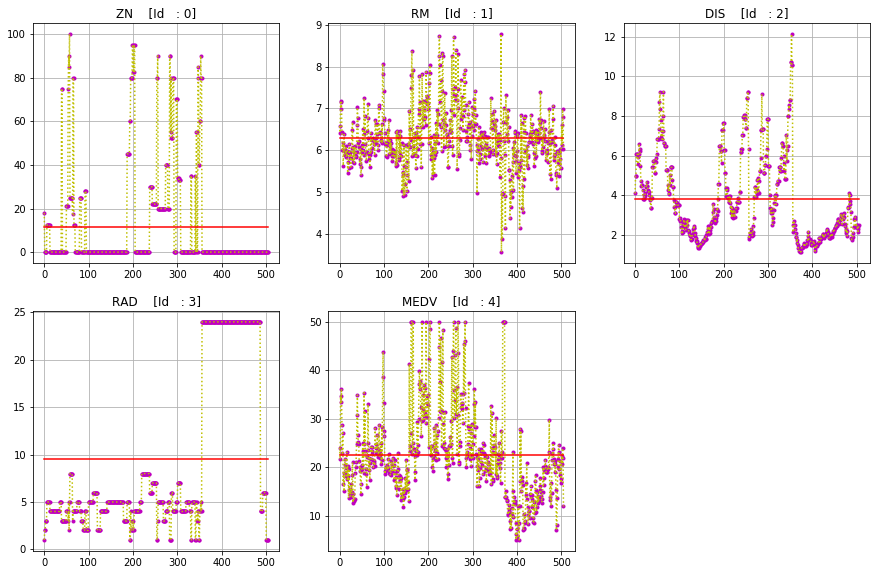

In [29]:
dummy_DataFrame_plotter(case_data_Boston,
                        plot_size=(15,15),
                        mixed_style=True,
                        plot_style=['m.', 'y:'],
                        grid=True,
                        have_lines=True,
                        constant_values=mean_Boston.values).show()


#### 1.3.2 Median

In [30]:
median_Boston = case_data_Boston.median()
print(median_Boston)

ZN       0.00000
RM       6.20850
DIS      3.20745
RAD      5.00000
MEDV    21.20000
dtype: float64


##### PLOT

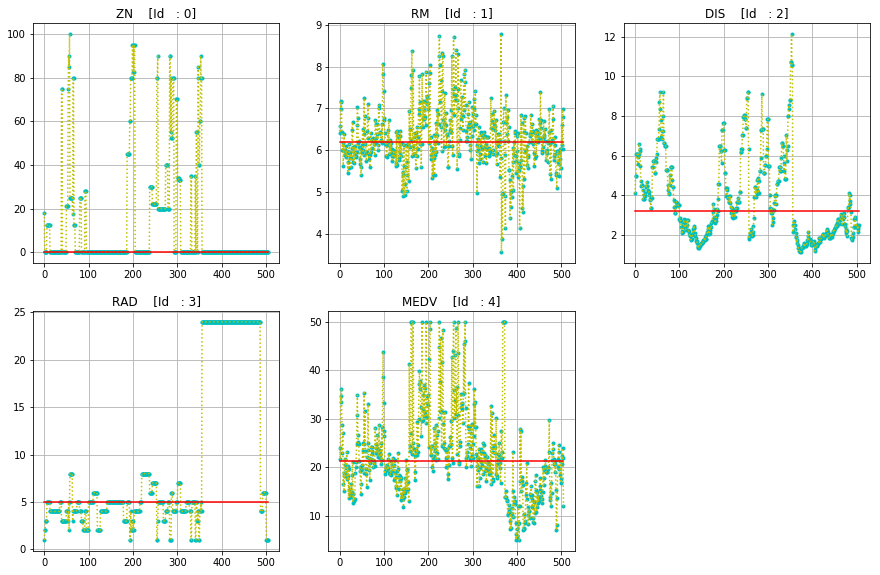

In [31]:
dummy_DataFrame_plotter(case_data_Boston,
                        plot_size=(15,15),
                        mixed_style=True,
                        plot_style=['c.', 'y:'],
                        grid=True,
                        have_lines=True,
                        constant_values=median_Boston.values).show()


#### 1.3.3 Mode

In [32]:
mode_Boston = case_data_Boston.mode(axis=1, numeric_only=True).copy()

histogram_container = []
for id_columns in range(mode_Boston.shape[1]):
    temp_bins, temp_ocurr = np.unique(mode_Boston.dropna().iloc[:, id_columns], 
                                              return_counts=True)
    
    histogram_container.append([copy(temp_ocurr), copy(temp_bins)])

##### PLOT

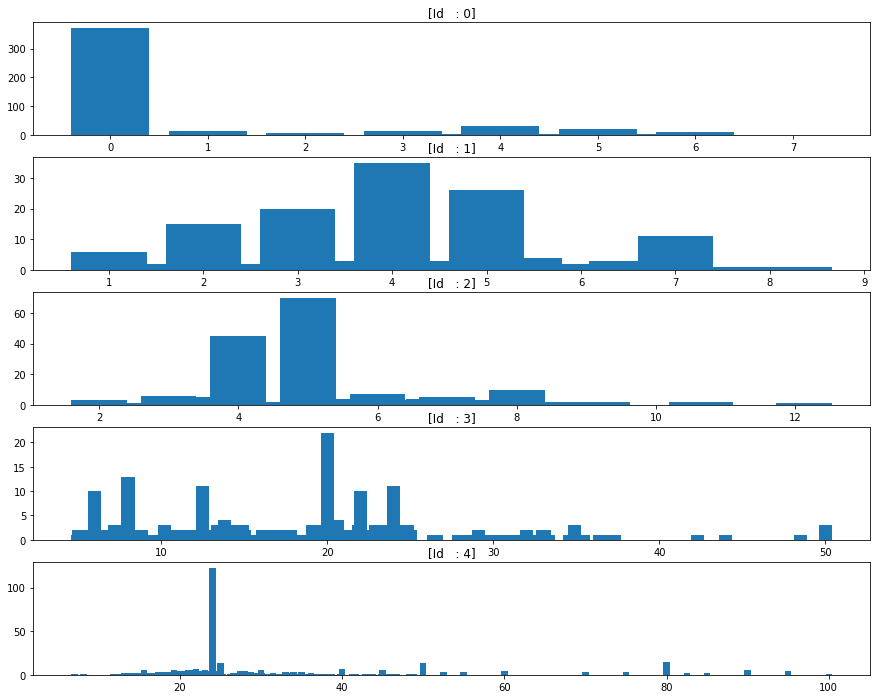

In [33]:
dummy_Histogram_plotter(histogram_container, grid_subplot=[5,1], plot_size=(15,12)).show()

##### 1.3.4 Quantile

In [34]:
quantile_n = 5
quantile_container = []
for ii in range(quantile_n):
    quantile_float = ((ii + 1.0) / quantile_n)
    quantile_container.append(case_data_Boston.quantile(q=quantile_float, axis=0).values)

##### PLOT

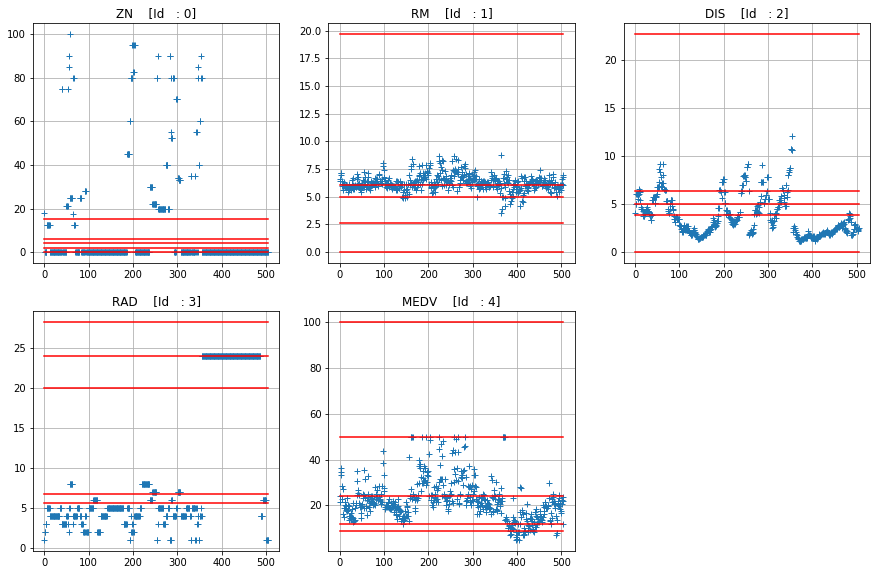

In [35]:
dummy_DataFrame_plotter(case_data_Boston,
                        plot_size=(15,15),
                        grid=True,
                        plot_style='+',
                        have_lines=True,
                        constant_values=quantile_container).show()


#### 1.3.5 Unique

In [36]:
unique_container = []
for id_columns in range(case_data_Boston.shape[1]):
    unique_temp = np.unique(case_data_Boston.dropna().iloc[:, id_columns])
    unique_container.append(unique_temp)

##### PLOT

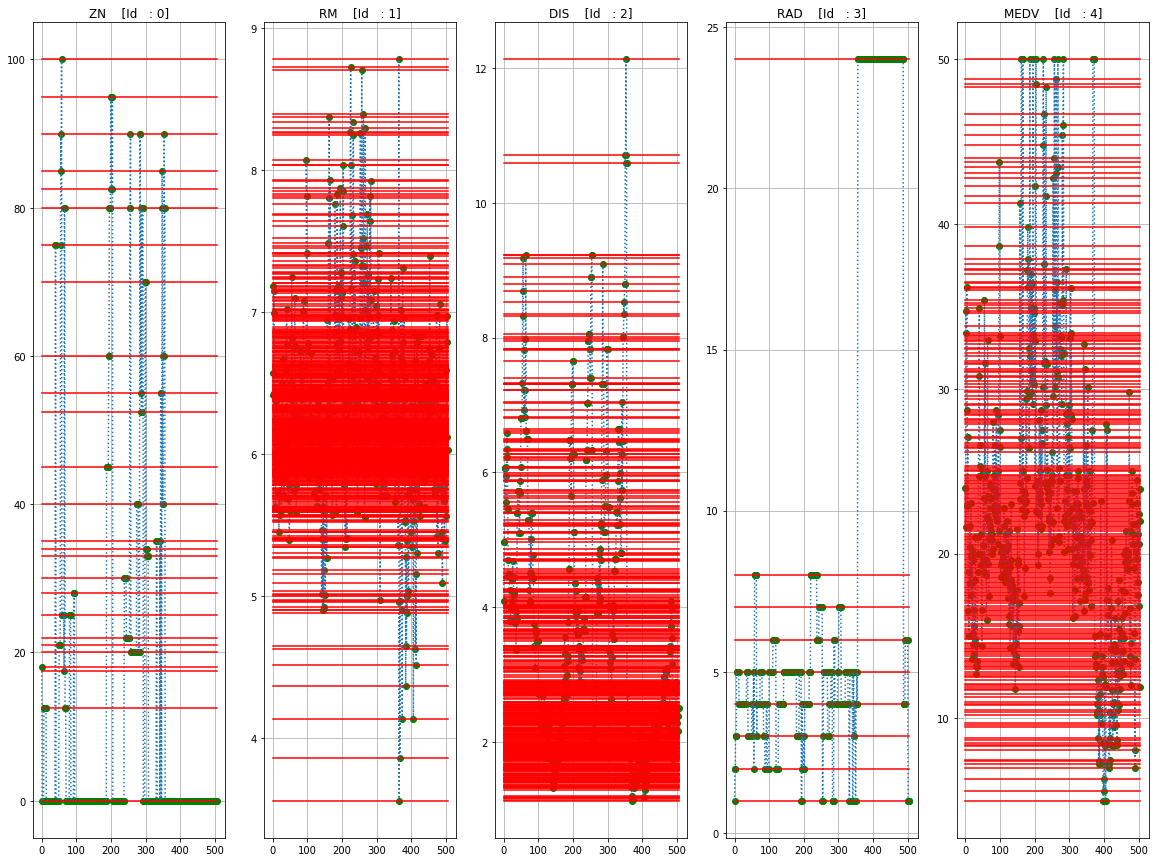

In [37]:
dummy_DataFrame_plotter(case_data_Boston,
                        grid_subplot=[1,5],
                        plot_size=(20,15),
                        grid=True,
                        mixed_style=True,
                        plot_style=['go', ':'],
                        have_lines=True,
                        constant_values=unique_container).show()

#### 1.3.6 General Description

In [38]:
case_data_Boston.describe(percentiles=None, include=None, exclude=None)

,ZN,RM,DIS,RAD,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000
mean,11.363636,6.284634,3.795043,9.549407,22.532806
std,23.322453,0.702617,2.105710,8.707259,9.197104
min,0.000000,3.561000,1.129600,1.000000,5.000000
25%,0.000000,5.885500,2.100175,4.000000,17.025000
50%,0.000000,6.208500,3.207450,5.000000,21.200000
75%,12.500000,6.623500,5.188425,24.000000,25.000000
max,100.000000,8.780000,12.126500,24.000000,50.000000


### 1.4 Hypotesis Related Questions and Answers

#### 1.4.1 The more close residential center are from Indutrial Center, the more dense are ?

#### 1.4.2 [1.4.1] The more close, the more accesible is?

#### 1.4.3 The rent increase the more nearly you are?